# 5.1 Game map analysis tests

In [1]:
%run "../Functions/5. Game map analysis.ipynb"

/Users/raphik12/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (18,21,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/raphik12/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (14,15,16,17,18,20,21,22,25,26,27,30,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Function tests

In [8]:
types = ["death", "reach", "add", "craft", "remove", "select", "selectmenu"]

In [ ]:
plotLocatedEvents(filterAndLocateEvents(types))

## Tinkering

### filterAndLocateEvents

In [9]:
rdf152.columns

Index([u'id', u'serverTime', u'userTime', u'gameVersion', u'playerId',
       u'playerBirthdate', u'playerRegion', u'playerCountry', u'playerGender',
       u'playerExternalId', u'playerCustomData', u'type', u'coordinates',
       u'section', u'customData.biobrick', u'customData.devices',
       u'customData.slot', u'customData.sound', u'customData',
       u'customData.duration', u'customData.nanobot', u'customData.language',
       u'customData.controls', u'customData.chapter', u'customData.life',
       u'customData.source', u'customData.platform',
       u'customData.localplayerguid', u'customData.sametab',
       u'customData.device', u'customData.energy', u'customData.option',
       u'customData.newtab', u'customData.dnabit', u'customData.count',
       u'customData.plasmid', u'customData.total', u'customData.message',
       u'customData.graphics'],
      dtype='object')

In [10]:
#rdf152['customData.chapter'].dropna().head()

#### Filter columns

In [11]:
mapRelevantColumns = ['type', 'section', 'coordinates']
mapDF = rdf152.loc[:,mapRelevantColumns]
len(mapDF)

82915

In [12]:
mapDF = mapDF.dropna()
len(mapDF)

75601

#### Filter by event type

In [13]:
mapDF = mapDF[mapDF["type"].isin(types)]
mapDF.head()

,type,section,coordinates
10,reach,tutorial1.Checkpoint00,"[-259, -713]"
11,death,tutorial1.Checkpoint00,"[-259, -713]"
12,death,tutorial1.Checkpoint00,"[-264, -708]"
14,select,tutorial1.Checkpoint00,"[-192, -767]"
15,craft,tutorial1.Checkpoint00,"[-192, -767]"


#### Filter by section

In [14]:
tutorial1DF = mapDF[(mapDF['section'].str.startswith('tutorial1'))]
#sandbox2DF = mapDF[(mapDF['section'].str.startswith('sandbox'))]
tutorial1DF.head(2)

,type,section,coordinates
10,reach,tutorial1.Checkpoint00,"[-259, -713]"
11,death,tutorial1.Checkpoint00,"[-259, -713]"


In [15]:
len(tutorial1DF)

62996

#### [x,y] coordinates

In [16]:
tutorial1DF['x'] = tutorial1DF['coordinates']
tutorial1DF['y'] = tutorial1DF['coordinates']

/Users/raphik12/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/raphik12/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
tutorial1DF.head(2)

,type,section,coordinates,x,y
10,reach,tutorial1.Checkpoint00,"[-259, -713]","[-259, -713]","[-259, -713]"
11,death,tutorial1.Checkpoint00,"[-259, -713]","[-259, -713]","[-259, -713]"


In [18]:
m = re.findall('-*\d+', '[-259, -713]')
m

['-259', '-713']

In [21]:
coordinates = re.findall('-*\d+', tutorial1DF['coordinates'][10])
coordinates

['-259', '-713']

In [ ]:
subsetCount = 100
tutorial1DF.index = range(0, subsetCount)

In [27]:
f = FloatProgress(min=0, max=len(tutorial1DF.index))
display(f)

for index in tutorial1DF.index:
    if(index > 100):
        break
    coordinates = re.findall('-*\d+', tutorial1DF['coordinates'][index])
    tutorial1DF['x'][index] = coordinates[0]
    tutorial1DF['y'][index] = coordinates[1]
    f.value += 1

In [23]:
subset = tutorial1DF.head(100)

ValueError: could not convert string to float: [-285, -421]

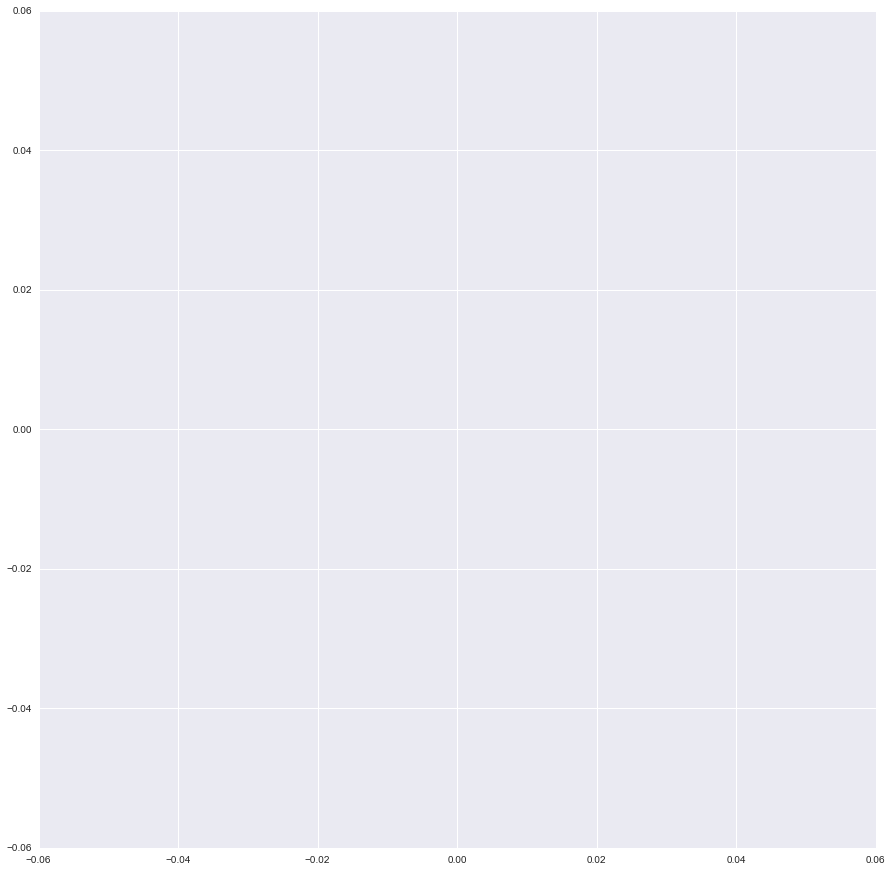

In [24]:
plt.figure(figsize=(15,15))
plt.axis('equal')

# c = ["black", "red", "blue", "green"]
c = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', ]
# a = [ 0.3, 1, 1,1 ]
a = [ 0.3, 1, 1, 1, 1, 1, 1, 1, 1, 1, ]

scatters = {}

for i, t in enumerate(types):
  pts = subset[subset["type"] == t]
  x = pts["x"]
  y = pts["y"]

  scatters[t] = plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.legend([ x[0] for x in scatters.values()], scatters.keys())
plt.show()